## Pandas 개요
- pandas는 for문을 사용하지 않고 데이터를 처리한다거나 배열 기반의 함수를 제공하는 등 NumPy의 배열 기반 계산 스타일을 많이 차용
- pandas가 NumPy 스타일을 많이 차용했지만 가장 큰 차이점은 pandas는 표 형식의 데이터나 다양한 형태의 데이터를 다루는 데 초점을 맞춰 설계
- 그에 비해 NumPy는 단일 산술 배열 데이터를 다루는 데 특화
- 고수준의 자료구조를 제공하고 파이썬 생태계 내의 다른 분석 라이브러리 등과 함께 사용

## 1. Pandas 자료구조

In [3]:
import pandas as pd
import numpy as np

### 1.1 Series
- 1차원 데이터

In [21]:
obj = pd.Series([4, 6, 12, -2, 21])
obj

0     4
1     6
2    12
3    -2
4    21
dtype: int64

In [17]:
obj.values

array([ 4,  6, 12, -2, 21], dtype=int64)

In [18]:
obj.index

RangeIndex(start=0, stop=5, step=1)

In [19]:
type(obj)

pandas.core.series.Series

In [22]:
obj2 = pd.Series([4, 7,-5, 3], index = ['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [24]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [28]:
obj2.values

array([ 4,  7, -5,  3], dtype=int64)

In [25]:
obj2['d']  # label 이름으로 색인

4

In [27]:
obj2[2]   # 정수로 색인

-5

In [29]:
obj2[[0, 1, 3]] # 팬시 색인 (정수로)

d    4
b    7
c    3
dtype: int64

In [30]:
obj2[['d', 'c', 'c']]   # 팬시 색인 (라벨로)

d    4
c    3
c    3
dtype: int64

In [31]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [32]:
obj2[obj2 > 0]   # boolean 색인

d    4
b    7
c    3
dtype: int64

In [33]:
obj2 * 2 # broadcasting

d     8
b    14
a   -10
c     6
dtype: int64

In [34]:
np.exp(obj2)  # universal function

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [35]:
sdata = {'Ohio': 3500, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio       3500
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [36]:
states = ['Califonia', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states)
obj4           # NaN: Not a Number

Califonia        NaN
Ohio          3500.0
Oregon       16000.0
Texas        71000.0
dtype: float64

In [37]:
pd.isnull(obj4)  # obj4.isnull

Califonia     True
Ohio         False
Oregon       False
Texas        False
dtype: bool

In [38]:
pd.isnull(obj4).sum() # null인 항목의 합

1

In [39]:
pd.notnull(obj4)

Califonia    False
Ohio          True
Oregon        True
Texas         True
dtype: bool

In [40]:
obj4.index

Index(['Califonia', 'Ohio', 'Oregon', 'Texas'], dtype='object')

In [41]:
obj4.values

array([   nan,  3500., 16000., 71000.])

In [42]:
obj4.name = 'population'
obj4

Califonia        NaN
Ohio          3500.0
Oregon       16000.0
Texas        71000.0
Name: population, dtype: float64

In [43]:
obj4.index.name = 'state'
obj4

state
Califonia        NaN
Ohio          3500.0
Oregon       16000.0
Texas        71000.0
Name: population, dtype: float64

In [45]:
obj

0     4
1     6
2    12
3    -2
4    21
dtype: int64

In [60]:
obj.index = ["Bob", "Joe", "Sea", "Bare", "Hurry"]
obj

Bob       4
Joe       6
Sea      12
Bare     -2
Hurry    21
dtype: int64

### Workshop

- 딕셔너리 -> 시리즈 변환 (index, values 출력)

In [48]:
dict_data = {'a': 1, 'b': 2, 'c': 3}

In [49]:
pd.Series(dict_data)

a    1
b    2
c    3
dtype: int64

- 리스트 -> 시리즈 변환 (index, values 출력)

In [50]:
list_data = ['2019-01-02', 3.14, 'ABC', 100, True]

In [51]:
pd.Series(list_data)

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object

- 튜플 -> 시리즈 변환 (index, values 출력)

In [53]:
tuple_data = ('영인', '2010-05-01', '여', True)

In [65]:
sr = pd.Series(tuple_data)

In [66]:
sr.index

RangeIndex(start=0, stop=4, step=1)

In [67]:
sr.values

array(['영인', '2010-05-01', '여', True], dtype=object)

- 튜플 -> 시리즈 변환 (index 설정)

In [55]:
tuple_data = ('영인', '2010-05-01', '여', True)
index_name = ['이름', '생년월일', '성별', '학생여부']

In [71]:
sr = pd.Series(tuple_data, index = index_name)

In [72]:
# 색인을 통해 '영인'값이 나오도록

pd.Series(tuple_data[0])

0    영인
dtype: object

- 시리즈 원소 선택

In [73]:
# 슬라이스 색인을 통해 '2010-05-01', '여' 값이 나오도록
pd.Series(tuple_data[1:3])

0    2010-05-01
1             여
dtype: object

In [74]:
sr.index

Index(['이름', '생년월일', '성별', '학생여부'], dtype='object')

In [75]:
sr.values

array(['영인', '2010-05-01', '여', True], dtype=object)

In [76]:
sr['이름']

'영인'

In [77]:
sr[1:3]

생년월일    2010-05-01
성별               여
dtype: object

In [78]:
sr['생년월일':'성별']

생년월일    2010-05-01
성별               여
dtype: object

### 1.2 DataFrame
- 2차원 데이터

In [92]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002, 2003], 
        'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [89]:
frame.index

RangeIndex(start=0, stop=6, step=1)

In [90]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [91]:
frame.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [93]:
type(frame)

pandas.core.frame.DataFrame

In [107]:
frame.head(3)  # 전체 데이터 중 앞에서부터 5행만 보여줌 - 숫자 설정으로 현재는 3행만

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


In [108]:
frame.tail(3)  # 전체 데이터 중 뒤에서부터 5행만 보여줌 - 숫자 설정으로 현재는 3행만

,state,year,pop
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [109]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [112]:
pd.DataFrame(data, columns = ['year', 'state', 'pop'])  # 컬럼 이름 바꾸기

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [113]:
pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'])  # 컬럼 추가하기

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [114]:
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'], index = ['one', 'two', 'three', 'four', 'five', 'six'])  # 컬럼 추가하기

In [115]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [116]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [117]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [118]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

**(1) 열 색인**

In [120]:
frame2['state'] # 2차원 데이터인 DataFrame을 색인하면 1차원 데이터인 Series

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

**(2) 행 색인**

In [122]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [123]:
frame2['one'] # error!

KeyError: 'one'

In [124]:
frame2.loc['one'] # 1차원 Series 데이터

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object

In [125]:
type(frame2.loc['one'])

pandas.core.series.Series

In [126]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [127]:
frame2.loc['one':'two']

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN


In [128]:
frame2['one':'two']  # 슬라이싱을 통해서 행을 가져올 때는 loc를 안써도 선택이 됨

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN


In [129]:
frame2['debt'] = 16.5 # 브로드캐스팅
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [130]:
frame2['debt'] = np.arange(6)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [131]:
sr = pd.Series([1, 2, 3, 4, 5, 6], index = ['one', 'two', 'three', 'four', 'five', 'six'])

In [132]:
frame2['debt'] = sr
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,1
two,2001,Ohio,1.7,2
three,2002,Ohio,3.6,3
four,2001,Nevada,2.4,4
five,2002,Nevada,2.9,5
six,2003,Nevada,3.2,6


In [134]:
sr = pd.Series([1, 3, 5], index = ['one', 'three', 'five'])
frame2['debt'] = sr
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,1.0
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,3.0
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,5.0
six,2003,Nevada,3.2,NaN


In [135]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [136]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [137]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [138]:
frame3.name = 'population'
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [139]:
frame3.index.name = 'year'
frame3.columns.name= 'state'

In [140]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


### 1.3 Index
- 컬럼명, 인덱스 (데이터과 행과 열을 알려주는 메타 데이터) 

In [141]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [142]:
obj.index

Index(['a', 'b', 'c'], dtype='object')

In [143]:
obj.index[:2]

Index(['a', 'b'], dtype='object')

In [146]:
labels = pd.Index(np.arange(3))
pd.Series([1, 2, 3], index = labels)

0    1
1    2
2    3
dtype: int64

### Workshop

- 딕셔너리 -> 데이터프레임

In [148]:
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

In [149]:
pd.DataFrame(dict_data)

,c0,c1,c2,c3,c4
0,1,4,7,10,13
1,2,5,8,11,14
2,3,6,9,12,15


- 행인덱스/열이름 설정

In [163]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [ ]:
# 준서, 예은 -> 학생1, 학생2

In [167]:
df.index = ['학생1', '학생2']
df

,나이,성별,학교
학생1,15,남,덕영중
학생2,17,여,수리중


In [ ]:
# 나이, 성별, 학교 -> 연령, 남녀, 소속

In [169]:
df.columns = ['연령', '남녀', '소속']
df

,연령,남녀,소속
학생1,15,남,덕영중
학생2,17,여,수리중


In [ ]:
# 행인덱스/열이름 변경
# rename 사용하여 변경 (부분적으로 수정하고 싶을 때)

In [170]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [173]:
df.rename(index = {'준서': '학생1', '예은': '학생2'}, inplace = True)

In [174]:
df

,나이,성별,학교
학생1,15,남,덕영중
학생2,17,여,수리중


In [178]:
df.rename(columns = {'나이': '연령', '성별': '남녀', '학교': '소속'}, inplace = True)
df

,연령,남녀,소속
학생1,15,남,덕영중
학생2,17,여,수리중


In [180]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']], 
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [181]:
df.rename(index = {'준서': '학생1', '예은': '학생2'}, columns = {'나이': '연령', '성별': '남녀', '학교': '소속'})

,연령,남녀,소속
학생1,15,남,덕영중
학생2,17,여,수리중


## 2. 중요한 기능들

### 2.1 재색인 

In [182]:
sr = pd.Series([1, 2, 3, 4], index = [0, 3, 4, 5])
sr

0    1
3    2
4    3
5    4
dtype: int64

In [183]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [185]:
sr.reindex(np.arange(6), method = 'bfill')

0    1
1    2
2    2
3    2
4    3
5    4
dtype: int64

In [189]:
sr.reindex(np.arange(6), method = 'ffill')

0    1
1    1
2    1
3    2
4    3
5    4
dtype: int64

### 2.2 로우나 컬럼 삭제하기

In [191]:
obj = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [192]:
obj.drop('c')

a    0
b    1
d    3
e    4
dtype: int32

In [193]:
obj.drop(['c', 'd'])

a    0
b    1
e    4
dtype: int32

In [194]:
data = pd.DataFrame(np)

ValueError: DataFrame constructor not properly called!

In [195]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                   index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [197]:
# axis = 0 (행축), axis = 1(열축)
# (1) drop 연산을 할 경우에는 지정된 "축을" 삭제
# (2) 통계/수학 메서드(sum, mean...)를 사용할 때는 "축을 따라서~" 계산

# 아래 세 라인은 모두 동일한 결과임
data.drop('Colorado') # axis = 0이 default value
data.drop('Colorado', axis = 0) # 행축을 삭제
data.drop('Colorado', axis = 'index') # 행축을 삭제

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


In [198]:
data.drop('two', axis = 1)
data.drop('two', axis = 'columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [203]:
data.drop(['two', 'four'], axis = 'columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### 2.3 색인하기, 선택하기, 거르기

In [211]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                   index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [229]:
data['two']   # data.two와 동일

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [230]:
data[['two', 'four']]

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [206]:
data.two

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [209]:
data['four is']

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four is, dtype: int32

In [213]:
data[['two', 'four']]

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [232]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


- loc, iloc

In [219]:
data.loc['Colorado']['one']   # 라벨 색인

4

In [220]:
data.iloc[1][0]   # 정수로 색인

4

In [222]:
data.loc['Colorado'][['one', 'three']]

one      4
three    6
Name: Colorado, dtype: int32

In [223]:
data.loc['Colorado', ['one', 'three']]

one      4
three    6
Name: Colorado, dtype: int32

In [225]:
data.iloc[1, [0, 2]]

one      4
three    6
Name: Colorado, dtype: int32

In [226]:
data.loc[:'Utah']

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [228]:
data.iloc[:3]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


### Workshop

- 행삭제

In [233]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [236]:
# '서준'행 삭제

df.drop('서준')

,수학,영어,음악,체육
우현,80,89,95,90
인아,70,95,100,90


In [244]:
# '서준', '우현' 행 삭제

df.drop(['서준', '우현'])

,수학,영어,음악,체육
인아,70,95,100,90


- 열 삭제

In [245]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [246]:
# '수학' 열 삭제
df.drop('수학', axis = 1)

,영어,음악,체육
서준,98,85,100
우현,89,95,90
인아,95,100,90


In [247]:
# '수학', '영어' 열 삭제
df.drop(['수학', '영어'], 1)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7160\709278109.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['수학', '영어'], 1)


,음악,체육
서준,85,100
우현,95,90
인아,100,90


- 행 선택

In [248]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [250]:
# '서준' 행 선택(라벨 색인, 정수 색인)
df.loc['서준']

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64

In [268]:
# '서준', '우현' 행 선택 (라벨 색인, 정수 색인, 슬라이싱)
df.loc[['서준', '우현']]

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


In [269]:
df.iloc[[0, 1]]

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


In [270]:
df.loc['서준':'우현']

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


In [267]:
df.iloc[:2]

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90


- 열 선택

In [271]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [276]:
# '수학' 열 선택
df['수학']

서준    90
우현    80
인아    70
Name: 수학, dtype: int64

In [280]:
# '음악', '체육' 열 선택
df[['음악', '체육']]

,음악,체육
서준,85,100
우현,95,90
인아,100,90


- 원소 선택

In [281]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [287]:
# '서준'의 '음악' 점수
df.loc['서준'][['음악']]

음악    85
Name: 서준, dtype: int64

In [288]:
#'서준'의 '음악','체육' 점수
df.loc['서준'][['음악', '체육']]

음악     85
체육    100
Name: 서준, dtype: int64

In [289]:
#'서준','우현'의 '음악','체육' 점수
df.loc[['서준', '우현']][['음악', '체육']]

,음악,체육
서준,85,100
우현,95,90


- 열 추가

In [290]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [293]:
# '국어' 열 추가, 값은 80 점 지정
df['국어'] = 80
df

,수학,영어,음악,체육,국어
서준,90,98,85,100,80
우현,80,89,95,90,80
인아,70,95,100,90,80


- 행 추가

In [22]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [25]:
# "본인 이름" 으로 행추가, 과목 점수도 지정
df.loc['우근'] = (100, 100, 100, 100)
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90
우근,100,100,100,100


- 원소 값 변경

In [7]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [16]:
# '서준'의 '체육' 점수를 80 점으로 변경(라벨 색인, 정수 색인)
df.loc['서준'][['체육']] = 80
df

,수학,영어,음악,체육
우근,90,98,85,100
서준,80,89,95,80
우현,70,95,100,90
인아,100,90,100,80


In [20]:
# '서준'의 '음악','체육' 점수 변경
df.loc['서준'][['음악', '체육']] = (80, 100)
df

,수학,영어,음악,체육
우근,90,98,85,100
서준,80,89,80,100
우현,70,95,100,90
인아,100,90,100,80


- 행, 열 바꾸기

In [5]:
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [6]:
df.T

,서준,우현,인아
수학,90,80,70
영어,98,89,95
음악,85,95,100
체육,100,90,90


In [32]:
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [33]:
df.set_index(['이름'], inplace = True)
df

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [36]:
df.reindex(['인아', '서준', '우현', '우근'])

,수학,영어,음악,체육
이름,,,,
인아,70.0,95.0,100.0,90.0
서준,90.0,98.0,85.0,100.0
우현,80.0,89.0,95.0,90.0
우근,NaN,NaN,NaN,NaN


In [37]:
df

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [38]:
df.reset_index()

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [40]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [41]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [47]:
frame2[['state', 'pop', 'debt']]

,state,pop,debt
one,Ohio,1.5,NaN
two,Ohio,1.7,NaN
three,Ohio,3.6,NaN
four,Nevada,2.4,NaN
five,Nevada,2.9,NaN


In [48]:
frame2.loc['two']

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [50]:
frame2.loc['two':'four']

,year,state,pop,debt
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN


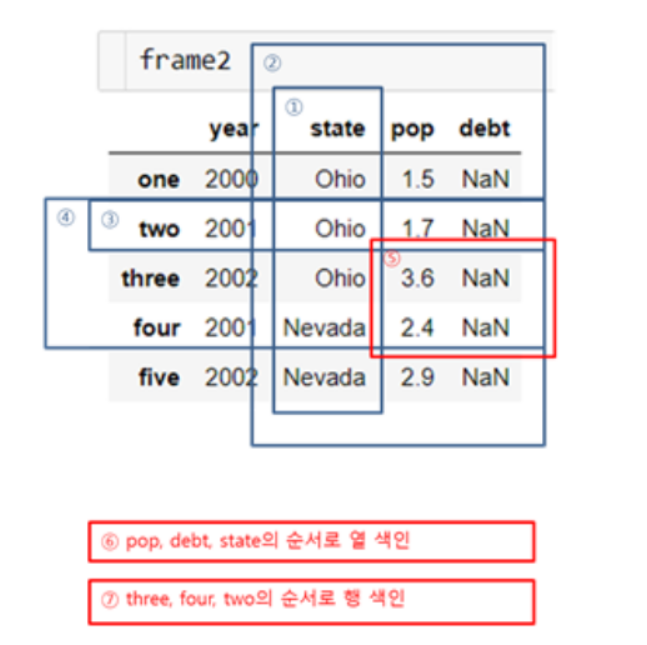

In [39]:
from IPython.display import Image
Image('./images/image7.png', width=400)

In [51]:
frame2.loc[['three', 'four'], ['pop', 'debt']]

,pop,debt
three,3.6,NaN
four,2.4,NaN


In [54]:
frame2[['pop', 'debt', 'state']]

,pop,debt,state
one,1.5,NaN,Ohio
two,1.7,NaN,Ohio
three,3.6,NaN,Ohio
four,2.4,NaN,Nevada
five,2.9,NaN,Nevada


In [56]:
frame2.loc[['three', 'four', 'two']]

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
two,2001,Ohio,1.7,NaN
